###Exercise 6

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

Fun with Numpy Slicing and Broadcast assignment.

1) Creating an array

In [3]:
a = np.array([[1.,2.],[3.,4.],[5.,6.]])
print a

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-3-494d5d9a6bcb>, line 2)

2)Getting Array shape

In [ ]:
print a.shape
print a.shape[0]
print a.shape[1]

3) Creating array of zeros

In [ ]:
b = np.zeros((10,5))
print b
print b.shape

4) Using for loop to write an array

In [4]:
c = np.zeros((10,5)) #Note the parenthesis. The argument is a tuple.
nrow, ncol = c.shape
for irow in range(nrow):
    for icol in range(ncol):
        c[irow,icol] = 20*irow + icol
        #you can do either c[irow][icol] or c[irow, icol]
print c

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-4-e8629f2fc99d>, line 7)

5) Access array.

In [5]:
#row 2
print c[2]
#row 2 column 3
print c[2][3]
print c[2,3] #either way

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-5-09866201bb8e>, line 2)

6) Array Slicing

In [6]:
print c[1:4,2] #first index can be from [2,4) = 2,3 (not including the end)
         #second index has to be 2

SyntaxError: invalid syntax (<ipython-input-6-c2fd12c5a941>, line 1)

In [7]:
print c[1, 1:5] #first index 1, second index from [1,5) = 1,2,3,4

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-7-4b3e28c06ad1>, line 1)

In [8]:
print c[1:3,2:5] #you can slice a rectangle from it too

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-8-c8de474b3794>, line 1)

In [9]:
print c[1:,2] #row 1 and on, column 2

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-9-1c910414313e>, line 1)

In [10]:
print c[:3,2] #row 0,1,2 and column 2

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-10-4b8db2380be4>, line 1)

In [11]:
print c[:3,:] #row 0,1,2 and every column

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-11-2ce854c214fb>, line 1)

7) The one we normally use

In [12]:
print c[:,1] #First index everything (:), Second index must be 1
             #this means getting column 1

SyntaxError: invalid syntax (<ipython-input-12-c780aad47892>, line 1)

In [13]:
print c[2,:] #First index is 2, Second index can be anything
             #This means row number 2.

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-13-2e20583e07df>, line 1)

8) Reference or copy? It's reference.

In [14]:
d = c[2,:]
print d
d[2] = 0
print d
print c

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-14-2d7c3c36cded>, line 2)

9) What if you want a copy?

In [15]:
c3 = c.copy()

NameError: name 'c' is not defined

In [16]:
c3[1,1] = 999
print c3
print c

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-16-33146458456b>, line 2)

10) Refrence is actually the right choice of implementation. It allows you to do this broadcast assignment.

In [17]:
c[7,:] = 1 #all row 7 or c becomes 1
print c

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-17-de7305916efe>, line 2)

In [18]:
#you can do this too
c[2,:] = c[3,:] + c[5,:]
print c

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-18-8c5923908308>, line 3)

In [19]:
c[:,1] = c[:,1]*2 #column 1 all multiply by 2
print c

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-19-c0ea1249b26b>, line 2)

###Gaussian Elimination.

See the notes. That's your homework.

###System of Non-Linear Equations.

Consider
$$x^2 + xy = 10$$
$$y + 3 xy^2 = 57$$

1) Write it in the form of
$$u(x,y) = 0$$
$$v(x,y) = 0$$

In [24]:
def u(x,y):
    return x**2 +x*y -10

def v(x,y):
    return y + 3*x*(y**2) -57



2) Let us visualize it by making 3d plot. Despite looking really cool it doesn't tell much.

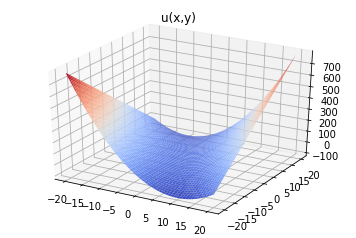

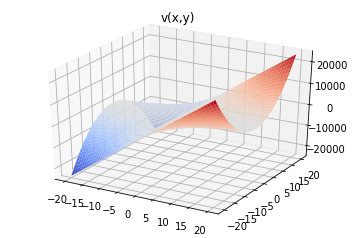

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy) ##<<<<<<And this too.   

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('u(x,y)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')        
ucs = ax.plot_surface(xgrid, ygrid, vz, cmap=cm.coolwarm)
plt.title('v(x,y)')

3) Contour plot.

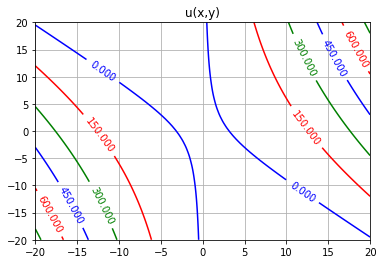

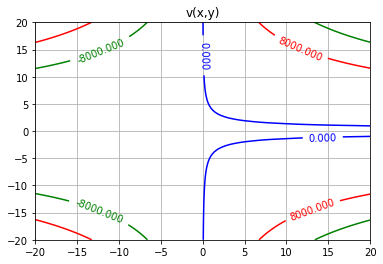

In [22]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 100
ny = 100
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)
 

ucs = plt.contour(x, y, uz, colors=('b','r','g'))
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('u(x,y)')

plt.figure()
vcs = plt.contour(x, y, vz, colors=('b','r','g'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y)')
plt.grid()

3) Which lines are we interested in?

4)Let's overlay them on top of each other.

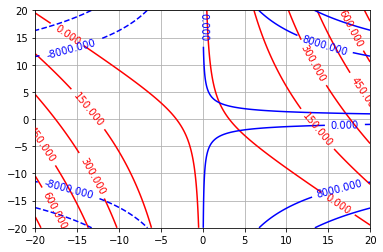

In [23]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

5) Where (approximately) are the solutions to $u(x,y)=0$ and $v(x,y)=0$

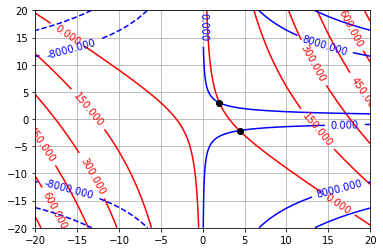

In [57]:
def dudx(x, y):
    return 2*x + y
def dudy(x, y):
    return x
def dvdx(x, y):
    return 3*y**2
def dvdy(x, y):
    return 1 +6*x*y
def u(x,y):
    return x**2 +x*y -10

def v(x,y):
    return y + 3*x*(y**2) -57



def newtonMethod(x0,y0, n):
    if (n==0):
        return (x0,y0)
    
    else:
        B = np.array([-u(x0,y0)+ dudx(x0,y0)*x0 + dudy(x0,y0)*y0, 
                      -v(x0,y0)+ dvdx(x0,y0)*x0 + dvdy(x0,y0)*y0])
        A = np.array(
            [
                [dudx(x0,y0), dudy(x0,y0)],
                [dvdx(x0,y0), dvdy(x0,y0)]
            ]
        )
        newx, newy =np.linalg.solve(A,B)
        return newtonMethod(newx, newy, n-1)

newmX, newmY = newtonMethod(1,1, 10)
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()
plt.plot(newmX, newmY,"o", color="Black")
newmX1, newmY1 = newtonMethod(5,-5,10)
plt.plot(newmX1, newmY1,"o", color ="Black")

##Newton's Method (>1D)

1) What matrix equation you need to solve to find the next guess ($x_{n+1}, y_{n+1}$)?

2)Where should you start your guess ($x_0, y_0$)?

3) Find ($x_1, y_1$)

In [2]:
def dudx(x, y):
    return 2*x + y
def dudy(x, y):
    return x
def dvdx(x, y):
    return 3*y**2
def dvdy(x, y):
    return 1 +6*x*y
def u(x,y):
    return x**2 +x*y -10

def v(x,y):
    return y + 3*x*(y**2) -57



def newtonMethod(x0,y0, n):
    if (n==0):
        return (x0,y0)
    
    else:
        B = np.array([-u(x0,y0)+ dudx(x0,y0)*x0 + dudy(x0,y0)*y0, 
                      -v(x0,y0)+ dvdx(x0,y0)*x0 + dvdy(x0,y0)*y0])
        A = np.array(
            [
                [dudx(x0,y0), dudy(x0,y0)],
                [dvdx(x0,y0), dvdy(x0,y0)]
            ]
        )

        newx, newy =np.linalg.solve(A,B)
        print(newx,newy)
        return newtonMethod(newx, newy, n-1)

newtonMethod(2,2,10)

NameError: name 'np' is not defined

4)Find ($x_2, y_2$)

5)Write a program to do what you just did and find  $(x_5, y_5)$? Plot to verify. (Just at plt.plot([x],[y])). You may use np.linalg.solve.

6) Find the other solution.

7) Does it guarantee to converge to the right answer?

8) Implement np.linalg.solve using gaussian elimination.